In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
from pycalphad.fitting import build_pymc_model
from pycalphad import Database
import pymc
import numpy as np
import glob

input_database = Database('Al-Ni-start.tdb')
dataset_names = sorted(glob.glob('BCC_B2*.json'))

LB2ALVA_A = pymc.Normal('LB2ALVA_A', mu=0, tau=1./50000**2)
B2ALVA_A = pymc.Normal('B2ALVA_A', mu=0, tau=1./50000**2)
B2ALVA_B = pymc.Normal('B2ALVA_B', mu=0, tau=1./30**2)
LB2NIVA_A = pymc.Normal('LB2NIVA_A', mu=0, tau=1./50000**2)
LB2NIVA_B = pymc.Normal('LB2NIVA_B', mu=0, tau=1./30**2)
B2NIVA_A = pymc.Normal('B2NIVA_A', mu=0, tau=1./50000**2)
B2NIVA_B = pymc.Normal('B2NIVA_B', mu=0, tau=1./30**2)
LB2ALNI_A = pymc.Normal('LB2ALNI_A', mu=0, tau=1./50000**2)
LB2ALNI_B = pymc.Normal('LB2ALNI_B', mu=0, tau=1./30**2)
B2ALNI_A = pymc.Normal('B2ALNI_A', mu=0, tau=1./50000**2)
B2ALNI_B = pymc.Normal('B2ALNI_B', mu=0, tau=1./30**2)
params = [LB2ALVA_A, B2ALVA_A, B2ALVA_B, LB2NIVA_A,
          LB2NIVA_B, B2NIVA_A, B2NIVA_B, LB2ALNI_A,
          LB2ALNI_B, B2ALNI_A, B2ALNI_B]
%time mod = build_pymc_model(input_database, dataset_names, params)
MDL = pymc.MCMC(mod)

CPU times: user 8.1 s, sys: 46 ms, total: 8.14 s
Wall time: 8.44 s


In [2]:
%time MDL.sample(iter=20000, burn=15000, burn_till_tuned=False, thin=2, progress_bar=True)

 [-----------------100%-----------------] 20000 of 20000 complete in 1203.1 secCPU times: user 20min 4s, sys: 609 ms, total: 20min 4s
Wall time: 20min 3s


Plotting LB2ALNI_A
Plotting B2ALVA_B
Plotting B2ALNI_A
Plotting LB2ALVA_A
Plotting B2ALNI_B
Plotting B2NIVA_B
Plotting LB2NIVA_A
Plotting LB2NIVA_B
Plotting dataset_variance
Plotting dataset_variance_0
Plotting B2NIVA_A
Plotting B2ALVA_A
Plotting LB2ALNI_B


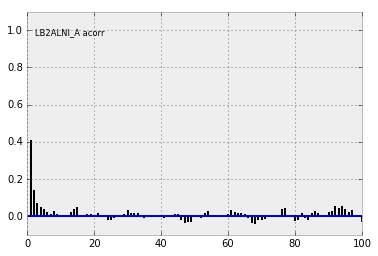

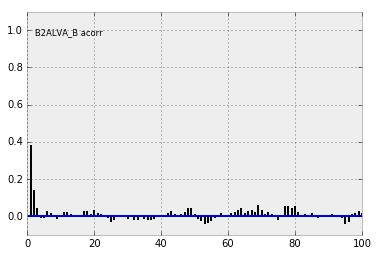

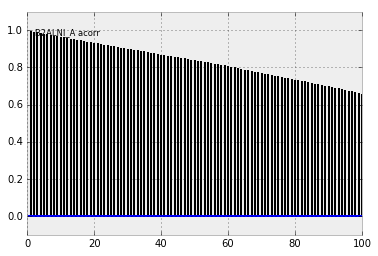

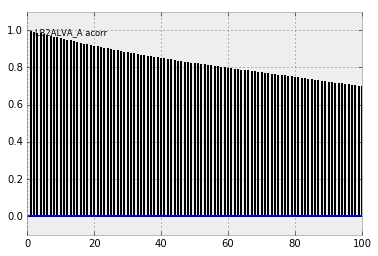

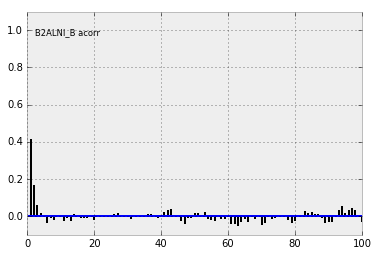

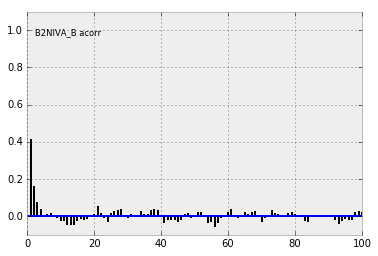

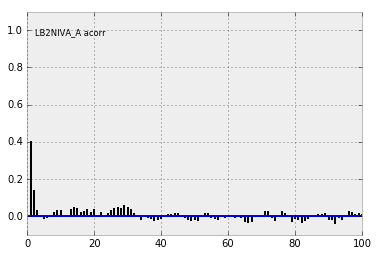

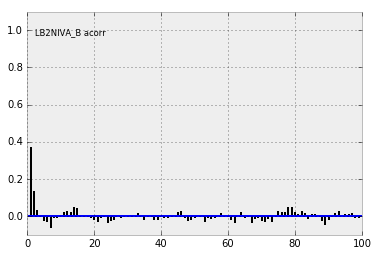

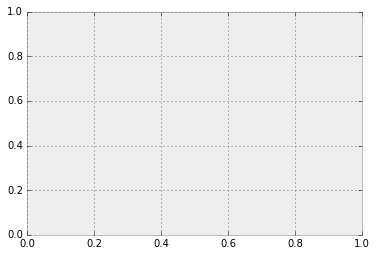

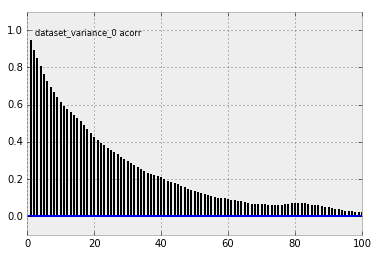

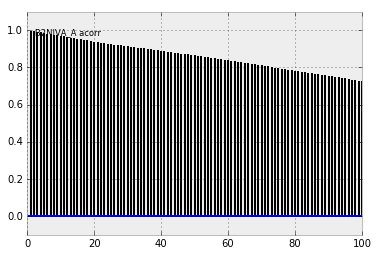

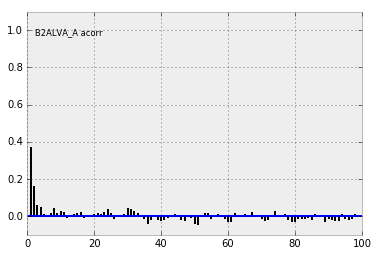

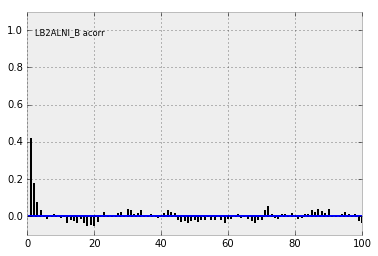

In [3]:
pymc.Matplot.autocorrelation(MDL)

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


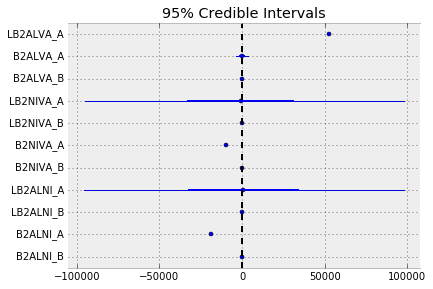

In [4]:
pymc.Matplot.summary_plot(params)

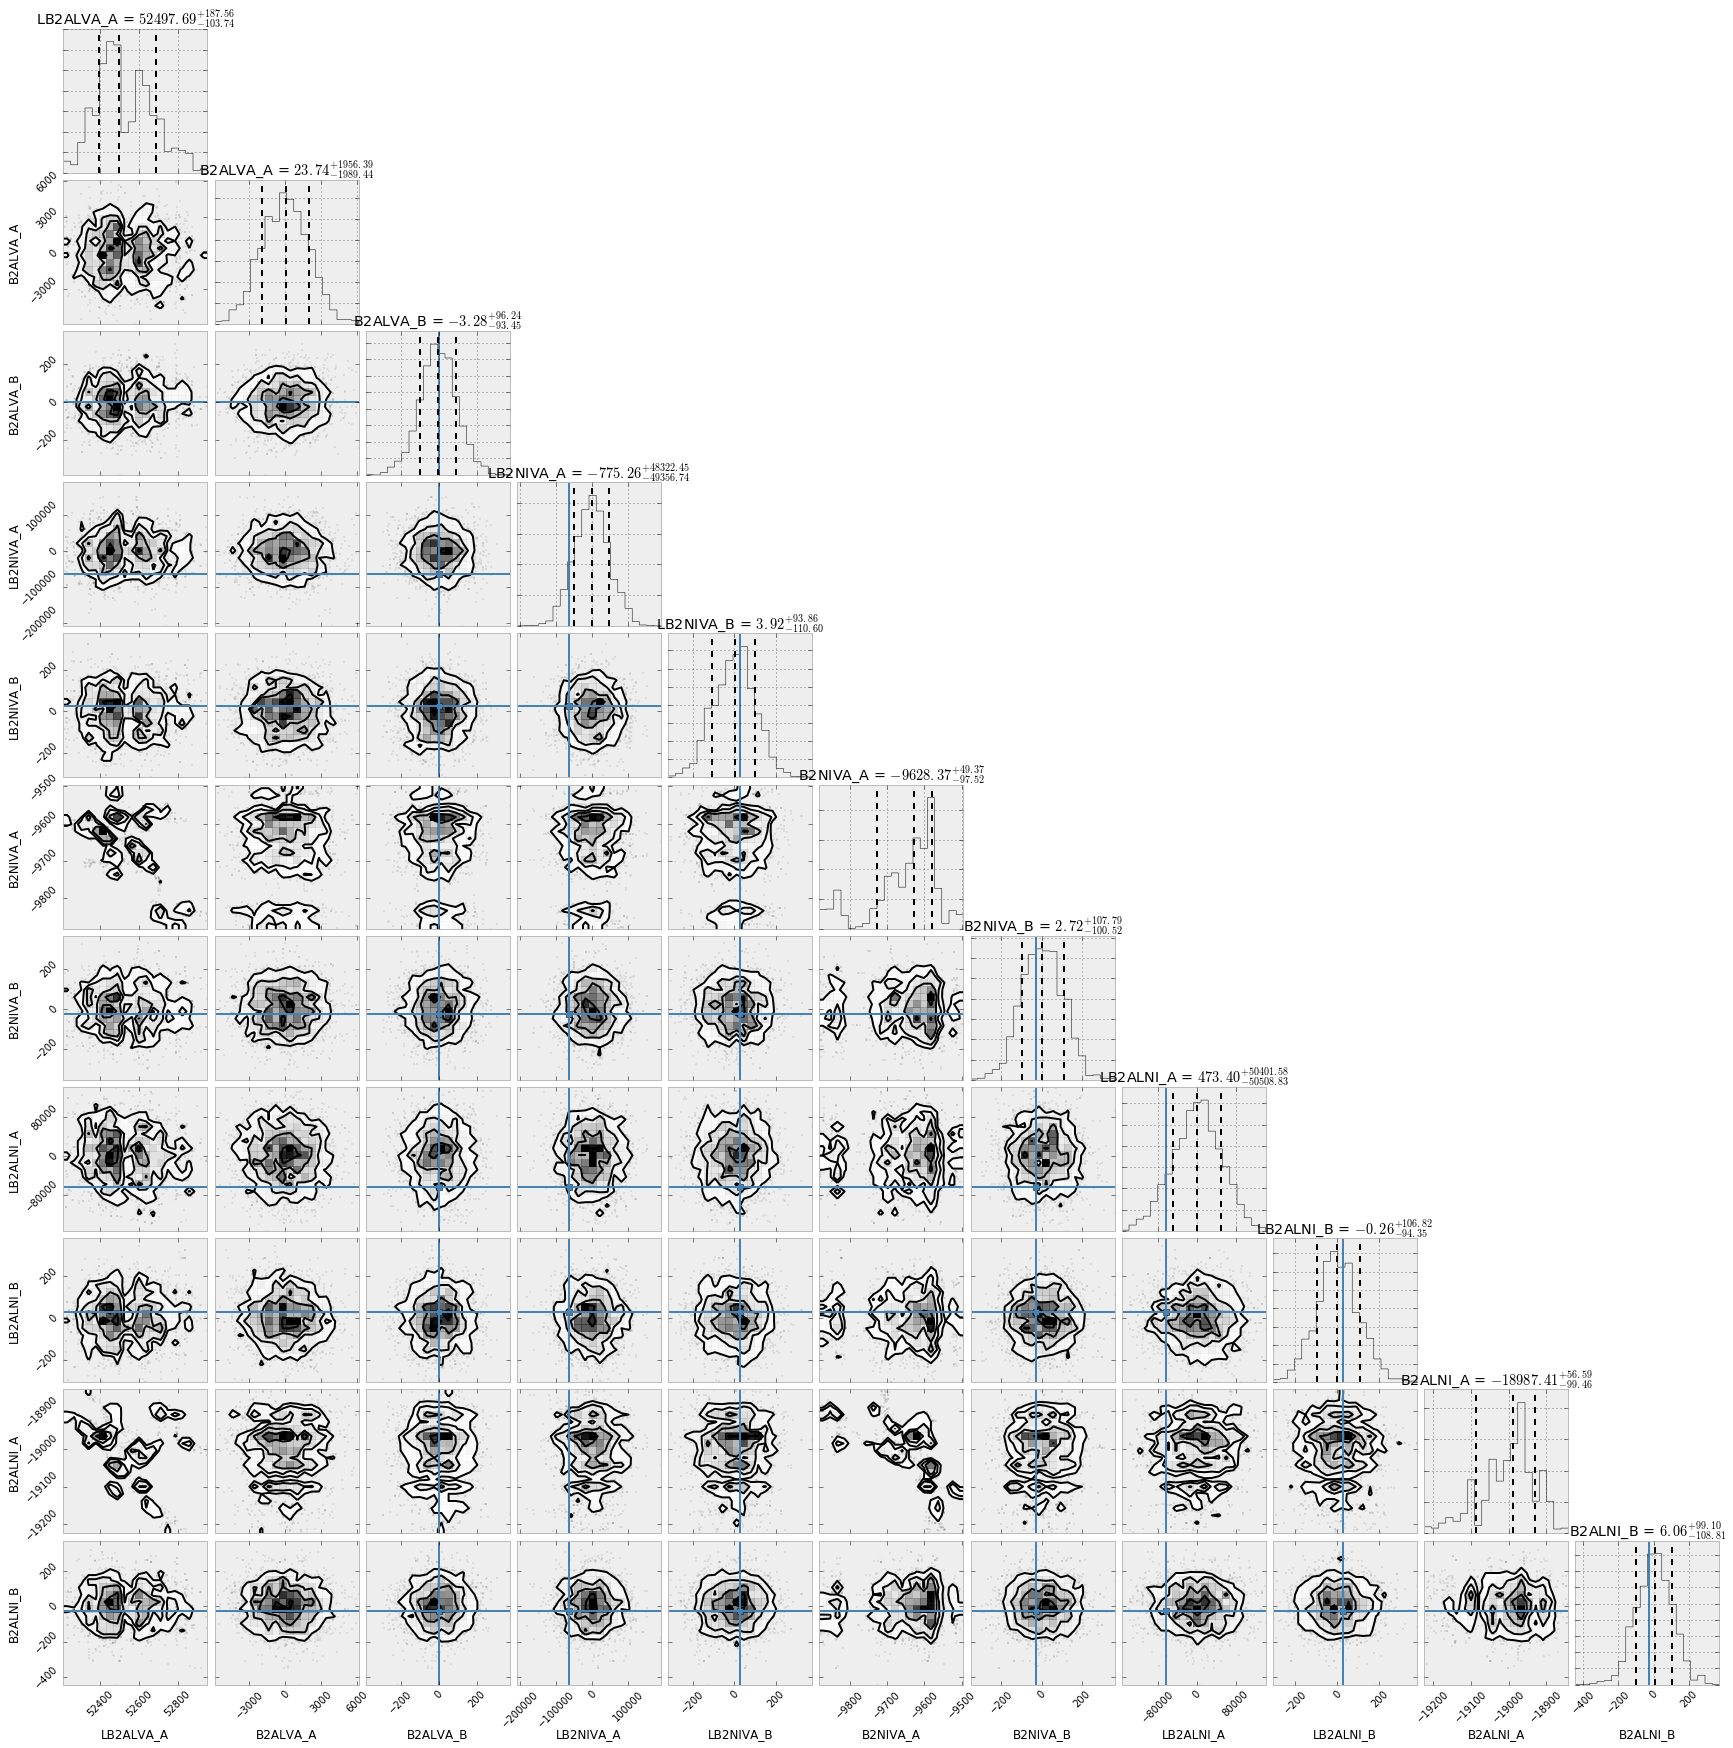

In [7]:
from corner import corner
from itertools import chain
data = np.vstack(chain([i.trace() for i in params])).T
corner(data, labels=[str(i) for i in params],
       quantiles=[0.16, 0.5, 0.84],
       truths=[150000, 10000, -1, -64024.38, 26.49419, 162397.3, -27.40575,
               -64024.38, 26.49419, 162397.3, -27.40575, -52440.88, 11.30117,
              -152397.3, 26.40575],
       show_titles=True, title_args={"fontsize": 40}).show()